In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
# We create a dictionary with some sample data
data = {'date': [
'2018-01-01', '2018-02-01',
'2018-03-01', '2018-04-01',
'2018-05-01', '2018-06-01',
'2018-01-01', '2018-02-01',
'2018-03-01', '2018-04-01',
'2018-05-01', '2018-06-01'],
'visitors': [35, 30, 82, 26, 83, 46, 40, 57, 95, 57, 87, 42]
}

In [ ]:
df = pd.DataFrame(data, columns=['date', 'visitors'])

In [ ]:
df.head()

Notice that when looking at the dataset, the rows have been given a number (starting with 0)


In [ ]:
df.dtypes

The _visitors_ column is of interger type, but the date column is shown to be an object. We know that this is a date and it would be preferable to use a more relevant type.
We can change this column with to_datetime


In [ ]:
# we can use to to_datetime method to convert Pandas columns into date object
df['date'] = pd.to_datetime(df['date'])

# We set index and sort the dataframe by that index
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

> The inplace property lets us make changes direclty to the dataframe. Otherwise, we would need to make copies of it to appy the changes.


In [ ]:
df.head()

In [ ]:
# all data points
df['2018']

In [ ]:
# Here we are filtering for the visitors in May
df['2018-05']

Other slicing and dicing techniques used in collection objects are possible thanks to the use of the colon notation


In [ ]:
df[datetime(2018, 3, 1):]

The _truncate_ methods can help us keep all the data points before or after a given data. In this case, let us ask for the data up to March 2018.


In [ ]:
# We can truncate the time series with the method
df.truncate(after=datetime(2018, 3, 1))

In [ ]:
df.truncate(after=datetime(2018, 2, 1))

In [ ]:
df.truncate(before=datetime(2018, 5, 1))

In [ ]:
# We can calculate aggregations with the help of groupby. In this case we are interested in the count
df.groupby('date').count()

As expected, we have two entries for each date. We can also look at statistics such as the mean and the sum of entries.
In this case, we are going to use `resample` method for a series.  
In effect this enables us to change the time frequency in our dataset. Let us use the `M` _offset alias_ to tell Pandas to create
monthly statistics.


In [ ]:
df.resample('M').mean() # we calculate the mean

In [ ]:
df.resample('M').sum() # we calculate the sum

| Alias    | Description                                      |
| -------- | ------------------------------------------------ |
| B        | business day frequency                           |
| C        | custom bunisness day frequency                   |
| D        | calendar day frequency                           |
| W        | weekly frequency                                 |
| M        | month-end frequency                              |
| Q        | quarter-end frequency                            |
| H        | hourly frequency                                 |
| S        | secondly frequency                               |
| N        | nanoseconds                                      |
| BQ       | business quarter-end frequency                   |
| QS       | quarter start frequency                          |
| SM       | semi-month-end frequency (15th and end of month) |
| BM       | business month-end frequency                     |
| MS       | month-start frequency                            |
| BH       | business hour frequency                          |
| BQS      | business quarter start frequency                 |
| SMS      | semi-month-start frequency (1st and 15th)        |
| CBM      | custom business month-end frequency              |
| BMS      | business month start frequency                   |
| CBMS     | custom business month-start frequency            |
| A, Y     | year-end frequency                               |
| L, ms    | milliseconds                                     |
| U, us    | microseconds                                     |
| BA, By   | business year-end frequency                      |
| AS, YS   | year-start frequency                             |
| T, min   | minutely frequency                               |
| BAS, BYS | businness year-start frequency                   |


In [ ]:
# Descriptive statistics for data entered manually. We are not including the count in this table
df.groupby('date').describe()

In [ ]:
# we can provide a data in plain natural language, and convert it to a date type
date = pd.to_datetime("14th of October, 2016")
date

| Directive | Meaning                                |
| --------- | -------------------------------------- |
| %a        | abbreviated weekday name               |
| %A        | full weekday name                      |
| %b        | abbreviated month name                 |
| %B        | full month name                        |
| %c        | preferred date and time representation |
| %d        | day of the month (1 to 31)             |
| %D        | same as %m/%d/%y                       |
| %e        | day of the month (1 to 31)             |
| %m        | month (1 to 12)                        |
| %M        | minute                                 |
| %S        | second                                 |
| %u        | weekday as number (Mon = 1 to 7)       |


In [ ]:
print('%A => ' + date.strftime('%A'))
print('%a => ' +  date.strftime('%a'))
print('%b => ' +  date.strftime('%b'))
print('%B => ' +  date.strftime('%B'))
print('%c => ' +  date.strftime('%c'))
print('%d => ' +  date.strftime('%d'))
print('%D => ' +  date.strftime('%D'))
print('%e => ' +  date.strftime('%e'))
print('%m => ' +  date.strftime('%m'))
print('%M => ' +  date.strftime('%M'))
print('%S => ' +  date.strftime('%S'))
print('%U => ' +  date.strftime('%U'))
print('%u => ' +  date.strftime('%u'))

In some case we may need to create time series data from scratch. In this section we are going to explore some of the ways  
which pandas enables us to crate and manipulate time series data on top the commands we have discussed up until this point.


In [ ]:
# we can determine a time series by specifying start and end times
pd.date_range('2018-05-30', '2018-06-02')

Note that the output of the command above is an index covering the time range requested with a daily frequency  
as shown in the output with `freq="D"`

An alternative to the above command is to provide a start date, but instead of giving an end date, we request a  
number of `periods` to cover with the time series.


In [ ]:
pd.date_range('2023-02-28', periods=4)

In [ ]:
# Here we provide a start time a number of periods and the frequency for those periods
# as you can see, all we had to do was specify the monthly frequency with freq="M"
pd.date_range('2023-02-28', periods=4, freq="M")

Let us construct a more complicated dataset: For a period of four days starting on June 4, 2018; we take  
reading for four features called, **A, B, C e D**. In this case we will generate the readings with a random  
number sampled from a standard normal distribution.


In [ ]:
from numpy.random import randn
idx = pd.date_range('2018-06-04 00:00:00', periods=4)
cols = ['A', 'B', 'C', 'D']

We will now create data for four rows and four columns with help of randin


In [ ]:
# randn(m, n) creates an anrray of m row and columns
data = randn(len(idx), len(cols))
data

In [ ]:
# Since we used random numbers to generate the dta, the numbers shown here will differ from
# those you may obtain on your computer

df = pd.DataFrame(data=data, index=idx, columns=cols)
df.index.name = 'date'
df

A table like the one above is useful to summarise data and it is fit for `human consumption`. However, in many application  
it is much better to have a `long format`or `melted` dataset

In ordet to achieve this, we nedd to repeat the dates and we also require a new column to hold the feature to which each  
rading corresponds. This can easily be done with **Pandas** in an single command.


In [ ]:
# This is because we need to date to be part of the new formatted dataset
df.reset_index(inplace=True)
df

In order to melt the dataframe, we will use the melt method that takes the following parameters:  
A column that will become the new identifier variable with `id_vars`, the columns to un-pivot are  
specified with `value_vars` and finally the names for the variables and value columns with `var_name`
and `value_name`


In [ ]:
# The original columns have become entries in the column called 'feature' and the values are in column 'reading'
melted = pd.melt(df, id_vars='date', var_name='feature', value_name='reading')
melted

In [ ]:
melted.set_index('date', inplace=True)
melted.sort_index(inplace=True)
melted

## Explore data Apple Inc.

In [20]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [4]:
base_files = os.path.join(os.getcwd(), '..', 'data', 'files')

In [5]:
# Make sure that you pass on the correct path for the file
appl = pd.read_csv(os.path.join(base_files, 'advanced-data-science-aapl.csv'), sep=',', encoding='utf-8')

In [6]:
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-25,143.910004,144.899994,143.869995,144.529999,142.279205,18871500
1,2017-04-26,144.470001,144.600006,143.380005,143.679993,141.442444,20041200
2,2017-04-27,143.919998,144.160004,143.309998,143.789993,141.550735,14246300
3,2017-04-28,144.089996,144.300003,143.270004,143.649994,141.412918,20860400
4,2017-05-01,145.100006,147.199997,144.960007,146.580002,144.297287,33602900


In [7]:
type(appl.Date)

pandas.core.series.Series

In [8]:
# We are using to_datetime to ensure that ates are appropriately typed
appl.Date = pd.to_datetime(appl.Date, format='%Y-%m-%d')
type(appl.Date)

pandas.core.series.Series

The dataset contains open, high, low and close prices for Apple Inc. stock between April 2017 and April 2018
We are goint to concentrate on the `Close` column, but before we do that, we need to ensure tat the dataset is
`indexed` by the time stamps provided by the `Date column`. We can easily do that with the `set_index method`


In [9]:
# We centre our attention on the use of the closing prices set Date like index
appl.set_index('Date', inplace=True)
appl['Close'].head(3)

Date
2017-04-25    144.529999
2017-04-26    143.679993
2017-04-27    143.789993
Name: Close, dtype: float64

In [10]:
appl.sort_index(inplace=True)

$$ R_{t} = \frac{P_{t} - P_{t} -1}{P_{t} -1} $$
- $ P\_{t} $ is the price
- _t_ is the time
- $ P\_{t} - 1 $ is the price at the previous time period

In [12]:
# we are using pct_change to calculate the returns
appl['pct_change'] = appl.Close.pct_change()

In [13]:
# The percentage change from one day to the next is easily calculated
appl['pct_change'].tail(3)

Date
2018-04-23   -0.002896
2018-04-24   -0.013919
2018-04-25    0.004357
Name: pct_change, dtype: float64

$$ r_{t} = log(1 + R_{t}) = log(\frac{P_{t}}{P_{t} -1}) = log(P_{t}) - log(P_{t} - 1) $$
We need to calculate the logarithm of the price at each time _t_ and then take the difference between time periods.  
We can certainly do this in Python, and Pandas gives us a helping hand with the diff().

In [16]:
# The diff method calculate the difference from one time period to the next
appl['log_ret'] = np.log(appl.Close).diff()
appl['log_ret'].tail(3)

Date
2018-04-23   -0.002901
2018-04-24   -0.014017
2018-04-25    0.004348
Name: log_ret, dtype: float64

This is the data that we show, we calculated that time series in the figure. It is fairly common to have financial data series like the one we have used above, where the frequency is given by the end of day prices. However, the frequency can be different for instance by the minimun upward or downward price movement in the price of security

In [17]:
parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y %H:%M')

In [21]:
bitcoin = pd.read_csv(os.path.join(base_files, 'bitcoin_usd.csv'), parse_dates=['time_start'], date_parser=parser, index_col='time_start')
bitcoin.head()

,exchange,market,open,high,low,close,volume
time_start,,,,,,,
2016-03-31 00:00:00,BITF,BTC/USD,413.04,413.27,413.04,413.27,8.953746
2016-03-31 00:01:00,BITF,BTC/USD,413.27,413.27,413.27,413.27,0.000000
2016-03-31 00:02:00,BITF,BTC/USD,413.27,413.27,413.27,413.27,0.000000
2016-03-31 00:03:00,BITF,BTC/USD,413.27,413.27,413.27,413.27,4.726186
2016-03-31 00:04:00,BITF,BTC/USD,413.27,413.27,413.27,413.27,0.000000


Notice that we are specifiying what columns need to be parsed as dates with `parse_dates` and how the parsing should be performed with `date_parser`. We also load the dataset indicating which column is the index.

In [22]:
ticks = bitcoin[['close', 'volume']] # we are effectily creating a new dataframe called ticks

The data is roughly on a minute-by-minute frequency. We can use Pandas to resample the data at desired intervals. For instance we can request for the data to be sampled every five minute and take the first value in the interval.


In [23]:
ticks.resample('5Min').first() # we can resample our data with the help of resample()

,close,volume
time_start,,
2016-03-31 00:00:00,413.27,8.953746
2016-03-31 00:05:00,413.26,0.035157
2016-03-31 00:10:00,413.51,43.640052
2016-03-31 00:15:00,414.98,0.038896
2016-03-31 00:20:00,414.98,0.241800
...,...,...
2016-04-03 23:35:00,420.60,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In [24]:
# we can also ask for the mean for example
ticks.resample('5Min').mean()

,close,volume
time_start,,
2016-03-31 00:00:00,413.270000,2.735987
2016-03-31 00:05:00,413.264000,2.211749
2016-03-31 00:10:00,414.660000,37.919166
2016-03-31 00:15:00,414.982000,5.574657
2016-03-31 00:20:00,414.986000,0.063756
...,...,...
2016-04-03 23:35:00,420.600000,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In this way we could get the closing price for the day by resampling by day and requesting the last volume


In [25]:
ticks.resample('D').last()

,close,volume
time_start,,
2016-03-31,416.02,0.200000
2016-04-01,417.90,52.099684
2016-04-02,420.30,0.850000
2016-04-03,420.60,0.984358


Now that we know how to resample the data, we can consider creating a new open high, low and close set of prices for the resampled data. The ohlc() method lets us find the OHLC prices for our new sampled data


In [26]:
bars = ticks['close'].resample('5Min').ohlc()
bars

,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,NaN,NaN,NaN,NaN
2016-04-03 23:45:00,NaN,NaN,NaN,NaN


Pandas will take the first and last values in the interval to be open
and close for the bar. Then it will take the max and min as the high and low
respectively. In this way, we start filtering the data. For example, imagine we are
interested in the price between 10 am and 4 pm each day


In [27]:
filtered = bars.between_time('10:00', '16:00')
filtered

,open,high,low,close
time_start,,,,
2016-03-31 10:00:00,416.00,416.00,415.98,415.98
2016-03-31 10:05:00,415.98,415.98,415.97,415.97
2016-03-31 10:10:00,415.97,415.97,415.96,415.96
2016-03-31 10:15:00,415.96,415.97,415.96,415.96
2016-03-31 10:20:00,415.96,415.98,415.96,415.96
...,...,...,...,...
2016-04-03 15:40:00,421.02,421.02,421.00,421.00
2016-04-03 15:45:00,421.01,421.01,421.01,421.01
2016-04-03 15:50:00,421.01,421.01,421.01,421.01


We may be interested in looking at the price first thing in the morning
in this case, we are using at_time method


In [28]:
bars.open.at_time('8:00')

time_start
2016-03-31 08:00:00    416.11
2016-04-01 08:00:00    416.02
2016-04-02 08:00:00    420.69
2016-04-03 08:00:00    418.78
Freq: 1440T, Name: open, dtype: float64

Not only that, we can request the percentage change too by combining the methods we have
already discussed


In [29]:
bars.open.at_time('8:00').pct_change()

time_start
2016-03-31 08:00:00         NaN
2016-04-01 08:00:00   -0.000216
2016-04-02 08:00:00    0.011225
2016-04-03 08:00:00   -0.004540
Freq: 1440T, Name: open, dtype: float64

Please note that the first percentage change connot be calculated as we do not have
a comparison data point from the previous interval. In this case, pandas indicates this by
the use of NaN


In [30]:
bars.tail()

,open,high,low,close
time_start,,,,
2016-04-03 23:35:00,420.6,420.6,420.6,420.6
2016-04-03 23:40:00,NaN,NaN,NaN,NaN
2016-04-03 23:45:00,NaN,NaN,NaN,NaN
2016-04-03 23:50:00,420.6,420.6,420.6,420.6
2016-04-03 23:55:00,421.0,421.0,420.6,420.6


We can fill in missing data with help of fillna, which taks a parameter called method.
It can be either 'pad' or 'ffill' to propagate last valid observation forward or instead
'backfill' or 'bfill' to use the next valid observation to fill the gap.

Here we have filled the missing data by bringing the last value forward and limiting the operation to one time period


In [31]:
bars.fillna(method='ffill', limit=1)

,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,420.60,420.60,420.60,420.60
2016-04-03 23:45:00,NaN,NaN,NaN,NaN


In [32]:
filledbars = bars.fillna(method='ffill')

In [33]:
volume = ticks.volume.resample('5Min').sum()
vol = volume.fillna(0.)

<AxesSubplot: >

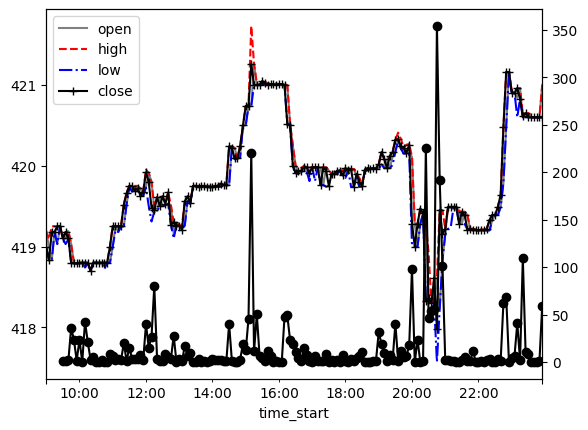

In [37]:
filledbars['2016-04-03'].between_time('9:00', '23:59').plot(color=['gray', 'red', 'blue', 'k'], style=['-', '--', '-.', '-+'])
vol['2016-04-03'].between_time('9:30','23:59').plot(secondary_y=True, style='k-o')

### White noise is whose intensity is the same at all frequencie within a given band

A good example of this would be white noise. In this case when facing this type of signal
the best we can do is simply predict the mean value of the dataset.

Let us create some white noise in Python with the help of numpy.


In [18]:
import numpy as np
import pandas as pd

In [5]:
white = 2 * np.random.random(size=2048) -1
white = pd.Series(white)

In the code above, we are using the random method in numpy.random to draw samples from a uniform distribution.
We would like our samples to be drawn from Uni f [ a, b) with a = −1 and b = 1 so that we have white noise withHence the use of (b − a)(sample) +
mean zero. A plot for one such time series is shown in

#### _Autocorrelation_

$$ R(s,t) = \frac{E[(X_{t} - \mu_{s})]}{\sigma*{t}\sigma*{s}}$$


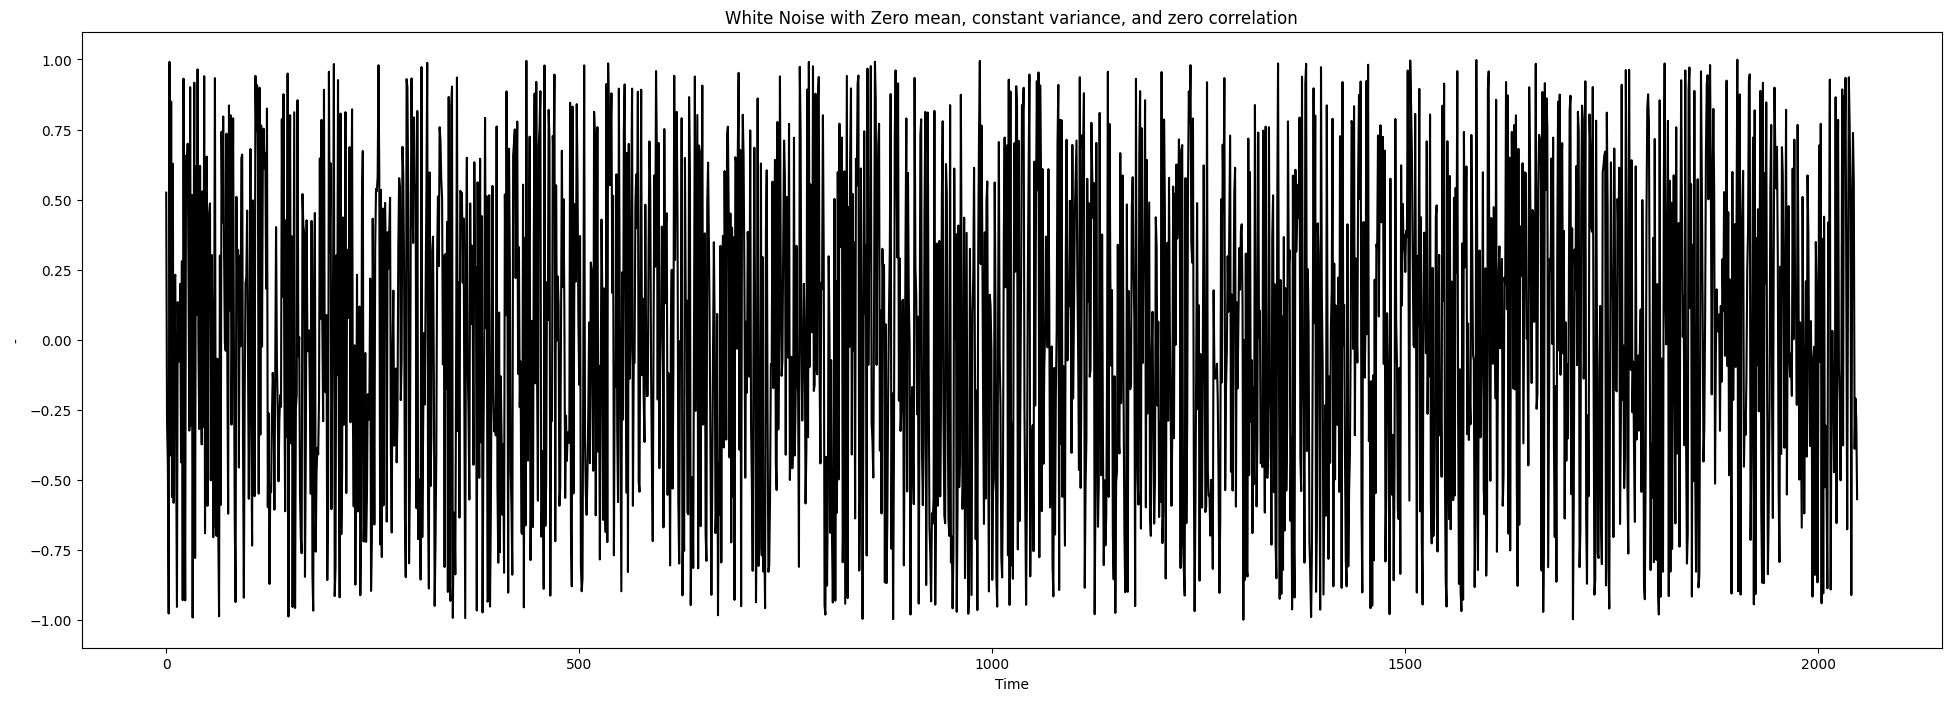

In [26]:
arr = white.plot(color=['black'], xlabel='Time', figsize=(24, 8), ylabel="-", title="White Noise with Zero mean, constant variance, and zero correlation")

Between the values of a time series and a lagged or shifted version of that same series.
Notice that we can recover the usual correlation definition for the case where $X_{t}$ and $X_{s}$
are two random variables not drawn from the same process at lagged times.


> Autocorrelation values lie between -1 and 1


In [28]:
for lag in range(1, 5):
    print("Autocorrelation at lag={} is {}".format(lag, white.autocorr(lag)))

Autocorrelation at lag=1 is 0.014270521587163814
Autocorrelation at lag=2 is -0.023015633128948054
Autocorrelation at lag=3 is -0.011752047259153658
Autocorrelation at lag=4 is -0.003751790493924168


The values returned by `autocorr` are the same as those we would obtain if we calculated the correlation
of the time series with a shifted version of itself


In [29]:
# As we can see the result the same
print(white.corr(white.shift(1)))

0.014270521587163814


Here `shift(n)` translates the series by `n` periods, in this case 1, enabling us to calculate
the autocorrelation value.

Finally, predicting or calculating the mean value can be readily done as follows:


In [30]:
print(white.mean())

0.0062439807577507975


Let us take a step forward and consider more interesting processes. If we were to compare the time series
for the closing prices of the Apple Stokc shown with the white noise we generated, we can clearly see that
there is indeed more structure in the price data.


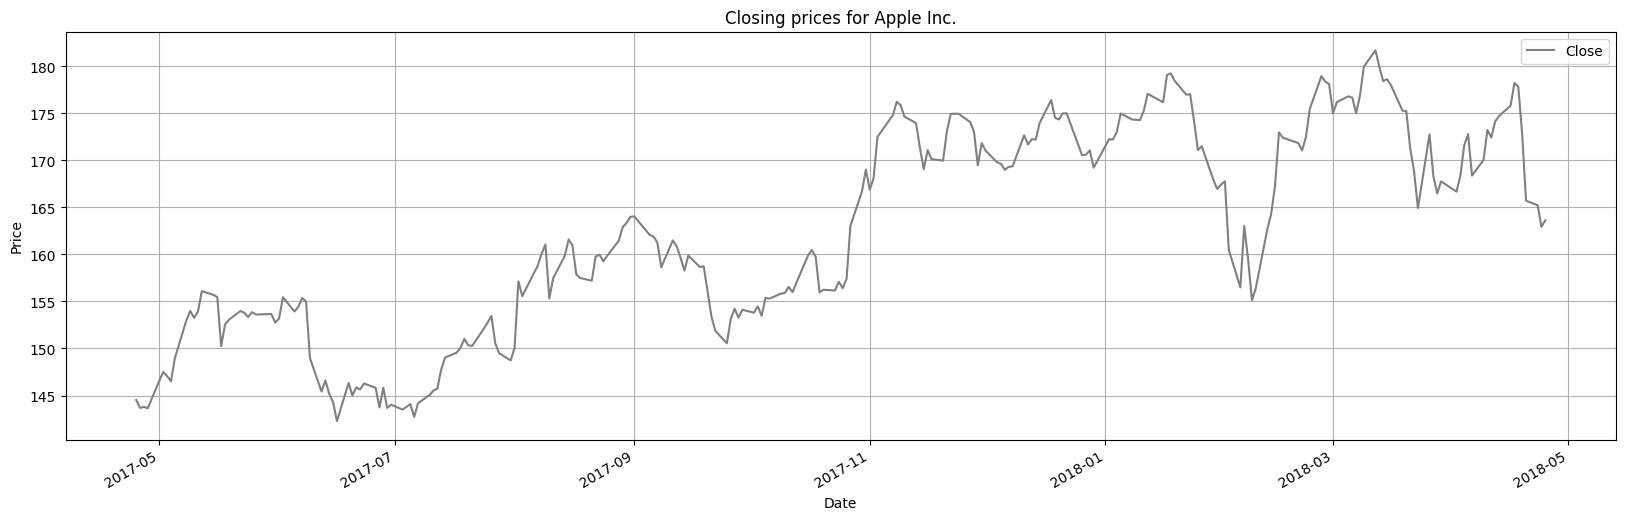

In [43]:
arr = appl['Close'].plot(
    color=['gray'], 
    figsize=(20, 6), 
    grid=True, 
    title="Closing prices for Apple Inc.", 
    xlabel="Date", 
    ylabel="Price",
    legend="-"
)

### Moving Averages and Exponential Smoothing

**We are interested in finding a model** that is able to forecast the next value in our times series data.
In the previous section we have seen how we can make some assumptions about dthe data we have and use that
to out advantage.

What about if we are able to forecast the future value based on the past values of the time series? For example
we may be able to take the average of the last *n* observations as forecast for the time period. **This methodology**
**is kown as *moving average***. For example, in the case where n = 3, the smoothened value at time *t*, $S_{t}$, 
will be given by:

$$ S_{t} = \frac{x_{{t} - 2} + x_{{t} - 1} + x_{t}}{3}$$


We can consider giving greater importance to more recent past value than older ones. It sounds plausible, right? Well, this is actually what *exponencial smoothing* enables us to do called *smoothing constants*. The simples method is appropriately called *simple exponential smoothing* (SES) and uses it one smoothing constant. $\alpha$

In SES, we start by setting $s_{0}$ to $x_{0}$ and subsequent periods at time *t* are given by:  
*The simple exponential smoothing method*
$$ S_{t} = \alpha x_{t} + (1 - \alpha) S_{t-1}$$



with 0 $\le \alpha \le$ 1. The smoothing is a function of $\alpha$; we have a quick smoothing when $\alpha$ is close to 1, and slow one when it is close to 0. We choose the value of $\alpha$ such that the mean of the squared error (MSE) is minimised.

We can calculate moving averages and exponnential smoothing on a time series with Pandas. For moving averages, we simply use the rolling method for Pandas dataframes.In the case of Apple Inc. Closing price we have been investigating, we can write the folling:

In [40]:
# Moving Averages
appl['MA3'] = appl['Close'].rolling(window=3).mean()
appl.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret,MA3
Date,,,,,,,,,
2017-04-25,143.910004,144.899994,143.869995,144.529999,142.279205,18871500,NaN,NaN,NaN
2017-04-26,144.470001,144.600006,143.380005,143.679993,141.442444,20041200,-0.005881,-0.005899,NaN
2017-04-27,143.919998,144.160004,143.309998,143.789993,141.550735,14246300,0.000766,0.000765,143.999995
2017-04-28,144.089996,144.300003,143.270004,143.649994,141.412918,20860400,-0.000974,-0.000974,143.706660
2017-05-01,145.100006,147.199997,144.960007,146.580002,144.297287,33602900,0.020397,0.020192,144.673330


Where we have provided the size of the moving window and indicated that the aggregation of the data will be the mean of the values.

For exponential smoothing, Pandas provides the *ewm* method. We simply pass the parameter $\alpha$ as follows:

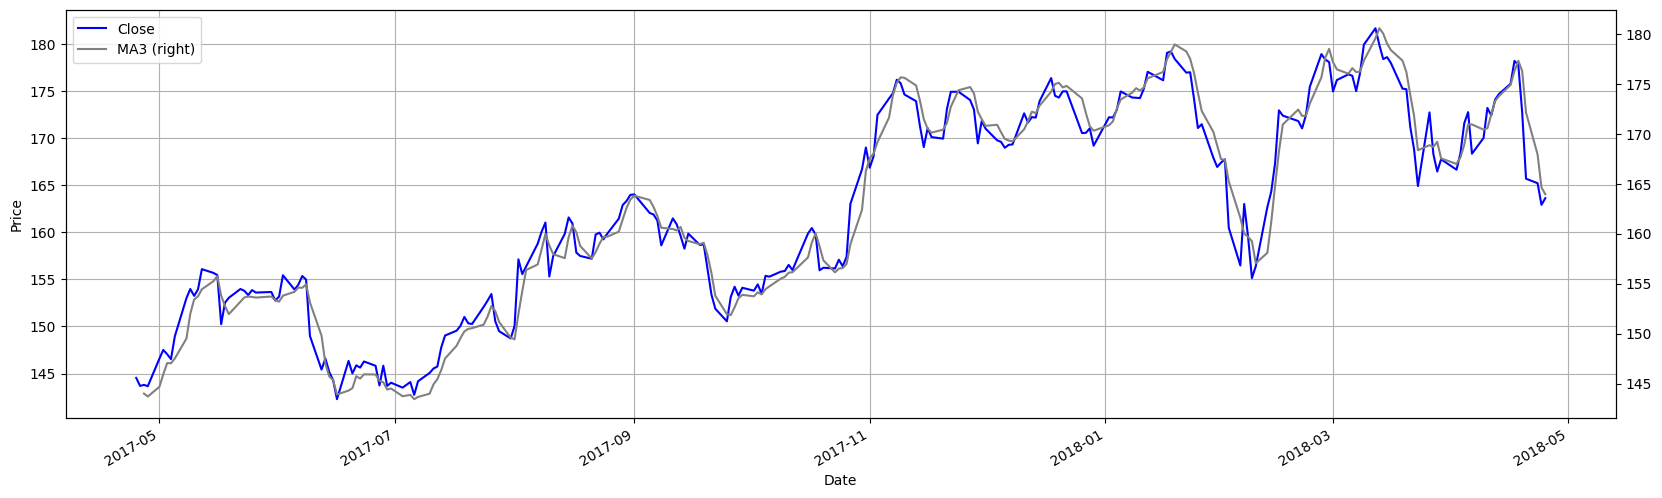

In [72]:
arr = appl['Close'].plot(color="blue",  figsize=(20, 6), grid=True, xlabel="Date",  ylabel="Price", legend="-")
arr = appl['MA3'].plot(secondary_y=True, color="gray", legend="--")

In [41]:
# EWM stands for Exponential Weighted Methods
alpha = 0.6
appl['EWMA'] = appl['Close'].ewm(alpha=alpha).mean()
appl.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret,MA3,EWMA
Date,,,,,,,,,,
2017-04-25,143.910004,144.899994,143.869995,144.529999,142.279205,18871500,NaN,NaN,NaN,144.529999
2017-04-26,144.470001,144.600006,143.380005,143.679993,141.442444,20041200,-0.005881,-0.005899,NaN,143.922852
2017-04-27,143.919998,144.160004,143.309998,143.789993,141.550735,14246300,0.000766,0.000765,143.999995,143.837686
2017-04-28,144.089996,144.300003,143.270004,143.649994,141.412918,20860400,-0.000974,-0.000974,143.706660,143.722112
2017-05-01,145.100006,147.199997,144.960007,146.580002,144.297287,33602900,0.020397,0.020192,144.673330,145.454587


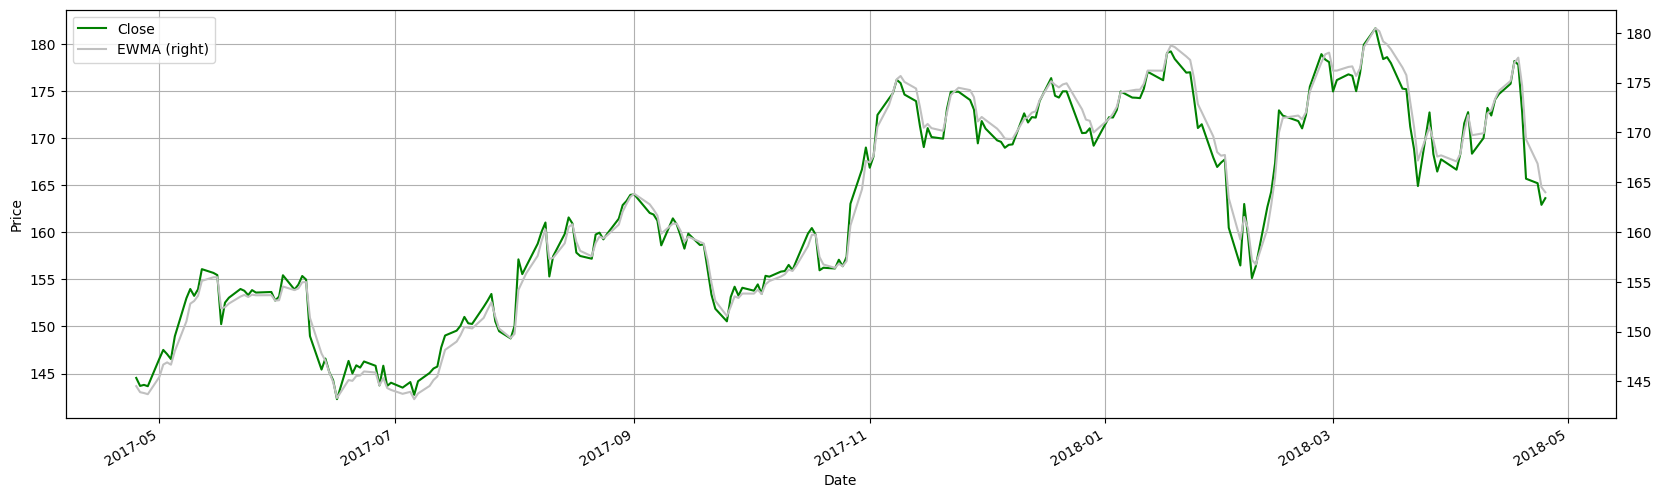

In [71]:
arr = appl['Close'].plot(color="green",  figsize=(20, 6), grid=True, xlabel="Date",  ylabel="Price", legend="-")
arr = appl['EWMA'].plot(secondary_y=True, color="silver", legend="--")

## Sunspot Data
[sunspot data](https://doi.org/10.6084/m9.figshare.6728255.v1)

In that figure we have monthly observations for the sun activity. In the analysis below we will resample the data into yearly observations. as a comma-separated value file with the name `sunspots_month.csv`. After loading the usual modules such as Pandas, we can read the data follows:

In [73]:
sun = pd.read_csv(os.path.join(base_files, 'sunspots_month.csv'), encoding='utf-8')
sun.Year = pd.to_datetime(sun.Year, format='%Y-%m-%d')
sun.set_index('Year', inplace=True)

In [74]:
sun.head()

,Value
Year,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


We are specifying the format in which the dates should be parsed. We also indicate which column is the index in our dataset. As we mentioned before, we have monthly data and we would like to take a yearly view. The first thing we are going to do is obtain a yearly average:

In [75]:
# We are resampling the data to a yearly frequency
sun_year = sun.resample('Y').mean()

In [86]:
# Fast Fourier transform capabilities are part of fftpack in scipy
from scipy.fft import fft

Given the signal of the yearly sunspot activity we can calculate its Fourier transform. We also calculate a normalisation constant *n*:

In [93]:
# We calculate the FFT of the signal and a normalisation constant
Y = fft(x=sun_year['Value'].values)
n = int(len(Y) / 2)

With this information we can create an array to hold the frequencies in the signal, with the period being the inverse frequency:

In [95]:
# With this information  we can obtain the period
freq = np.array(range(n)) / (2 * n)
period = 1./freq

We can now calculate the power spectrum of the signal as follows:

In [112]:
# The power spectrum of the signal
power = abs(Y[0:n])**2

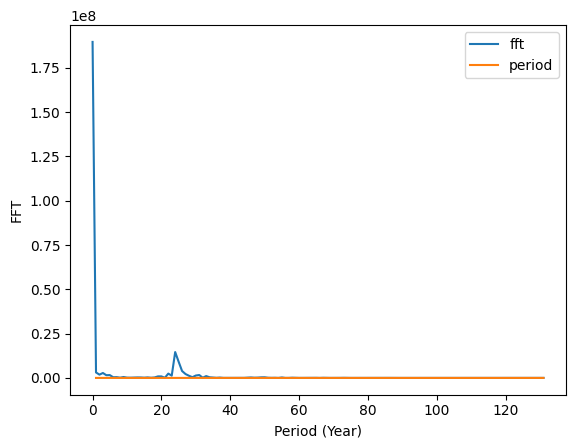

In [118]:
sunspot = pd.DataFrame(data={'fft': power, 'period': period})
ax = sunspot.plot(xlabel="Period (Year)", ylabel="FFT")

Analysis of the power spectrum of the sunspots data. We can see that a maximum in activity accurs approximately 11 years

## Determining Stationarity
**We have seen that there is** seasonality in our sunspot data and so, it is a non-stationary time series. In other cases we may need to check that the mean and variance are constant and the autocorrelation is time-independent. We can do some of these checks by plotting rolling statistics to see if the moving average and or moving variance vary with time.

`The Dickey-Fuller tests enables us to check for stationarity too`

In [122]:
rolling_mean = sun_year['Value'].rolling(2).mean()
rolling_std = sun_year['Value'].rolling(2).std()

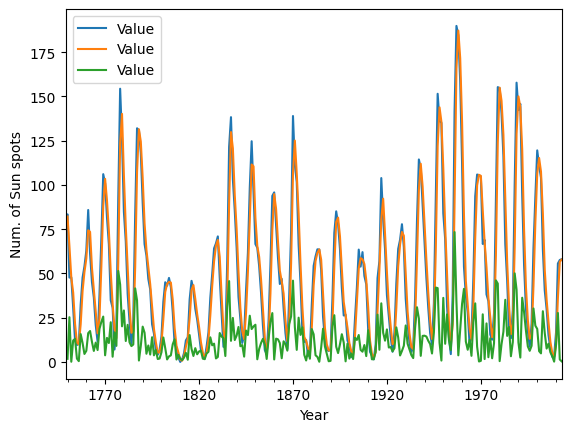

In [129]:
sun_year.plot(legend="Sunspot activity", ylabel="Num. of Sun spots")
rolling_mean.plot(legend="Rolling Mean")
ax = rolling_std.plot(legend="Rolling Starndard Deviation")